In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
## Check the weights

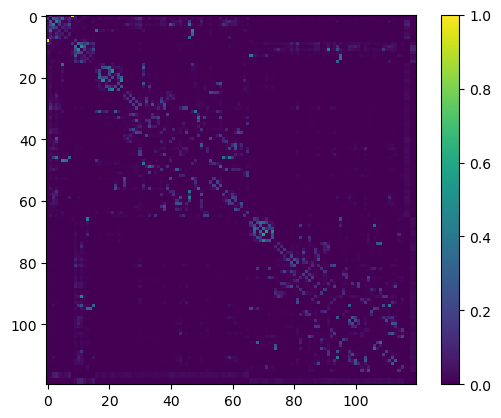

In [2]:
atlas = 'schaefer'
weights = pd.read_csv(f'{atlas}_weights_with_dopa.csv', index_col=0)
regions_names = list(weights.index)
#weights = (weights/np.max(weights)).values
plt.imshow(weights)
plt.colorbar()
plt.show()

In [8]:
Ce_mask = np.load('schaefer_exc_mask.npy')
Ci_mask = np.load('schaefer_inh_mask.npy')
Cd_mask = np.load('schaefer_dopa_mask.npy')

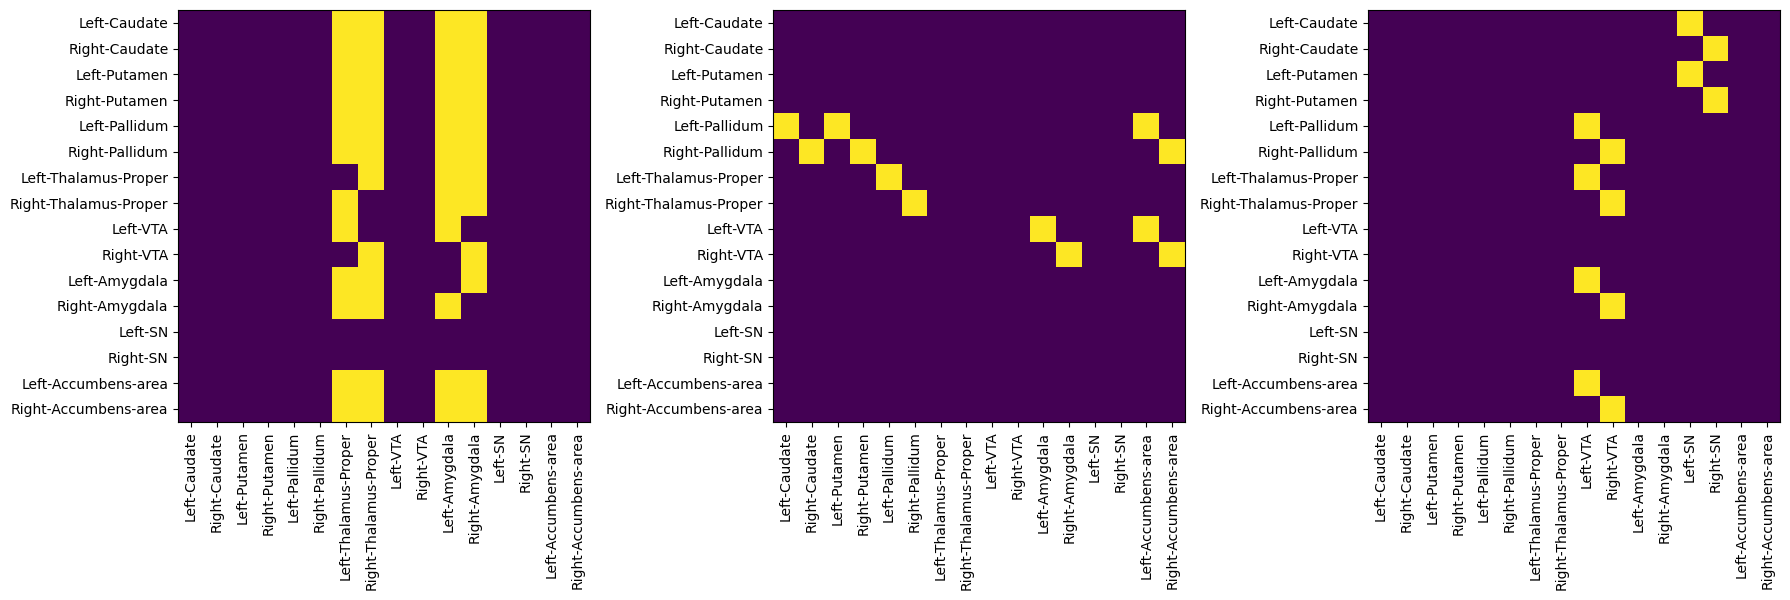

In [9]:
rois = ['Left-Caudate', 'Right-Caudate', 'Left-Putamen', 'Right-Putamen', 'Left-Pallidum', 'Right-Pallidum', 'Left-Thalamus-Proper', 'Right-Thalamus-Proper', 'Left-VTA', 'Right-VTA', 'Left-Amygdala', 'Right-Amygdala', 'Left-SN', 'Right-SN', 'Left-Accumbens-area', 'Right-Accumbens-area']
rois_idx = [regions_names.index(i) for i in rois]

Ce_reduced = Ce_mask[rois_idx, :][:, rois_idx]
Ci_reduced = Ci_mask[rois_idx, :][:, rois_idx]
Cd_reduced = Cd_mask[rois_idx, :][:, rois_idx]

plt.figure(figsize=(18,6))
plt.subplot(131)
plt.imshow(Ce_reduced)
plt.xticks(np.arange(len(rois)), rois, rotation=90)
plt.yticks(np.arange(len(rois)), rois)
plt.subplot(132)
plt.imshow(Ci_reduced)
plt.xticks(np.arange(len(rois)), rois, rotation=90)
plt.yticks(np.arange(len(rois)), rois)
plt.subplot(133)
plt.imshow(Cd_reduced)
plt.xticks(np.arange(len(rois)), rois, rotation=90)
plt.yticks(np.arange(len(rois)), rois)
plt.tight_layout()

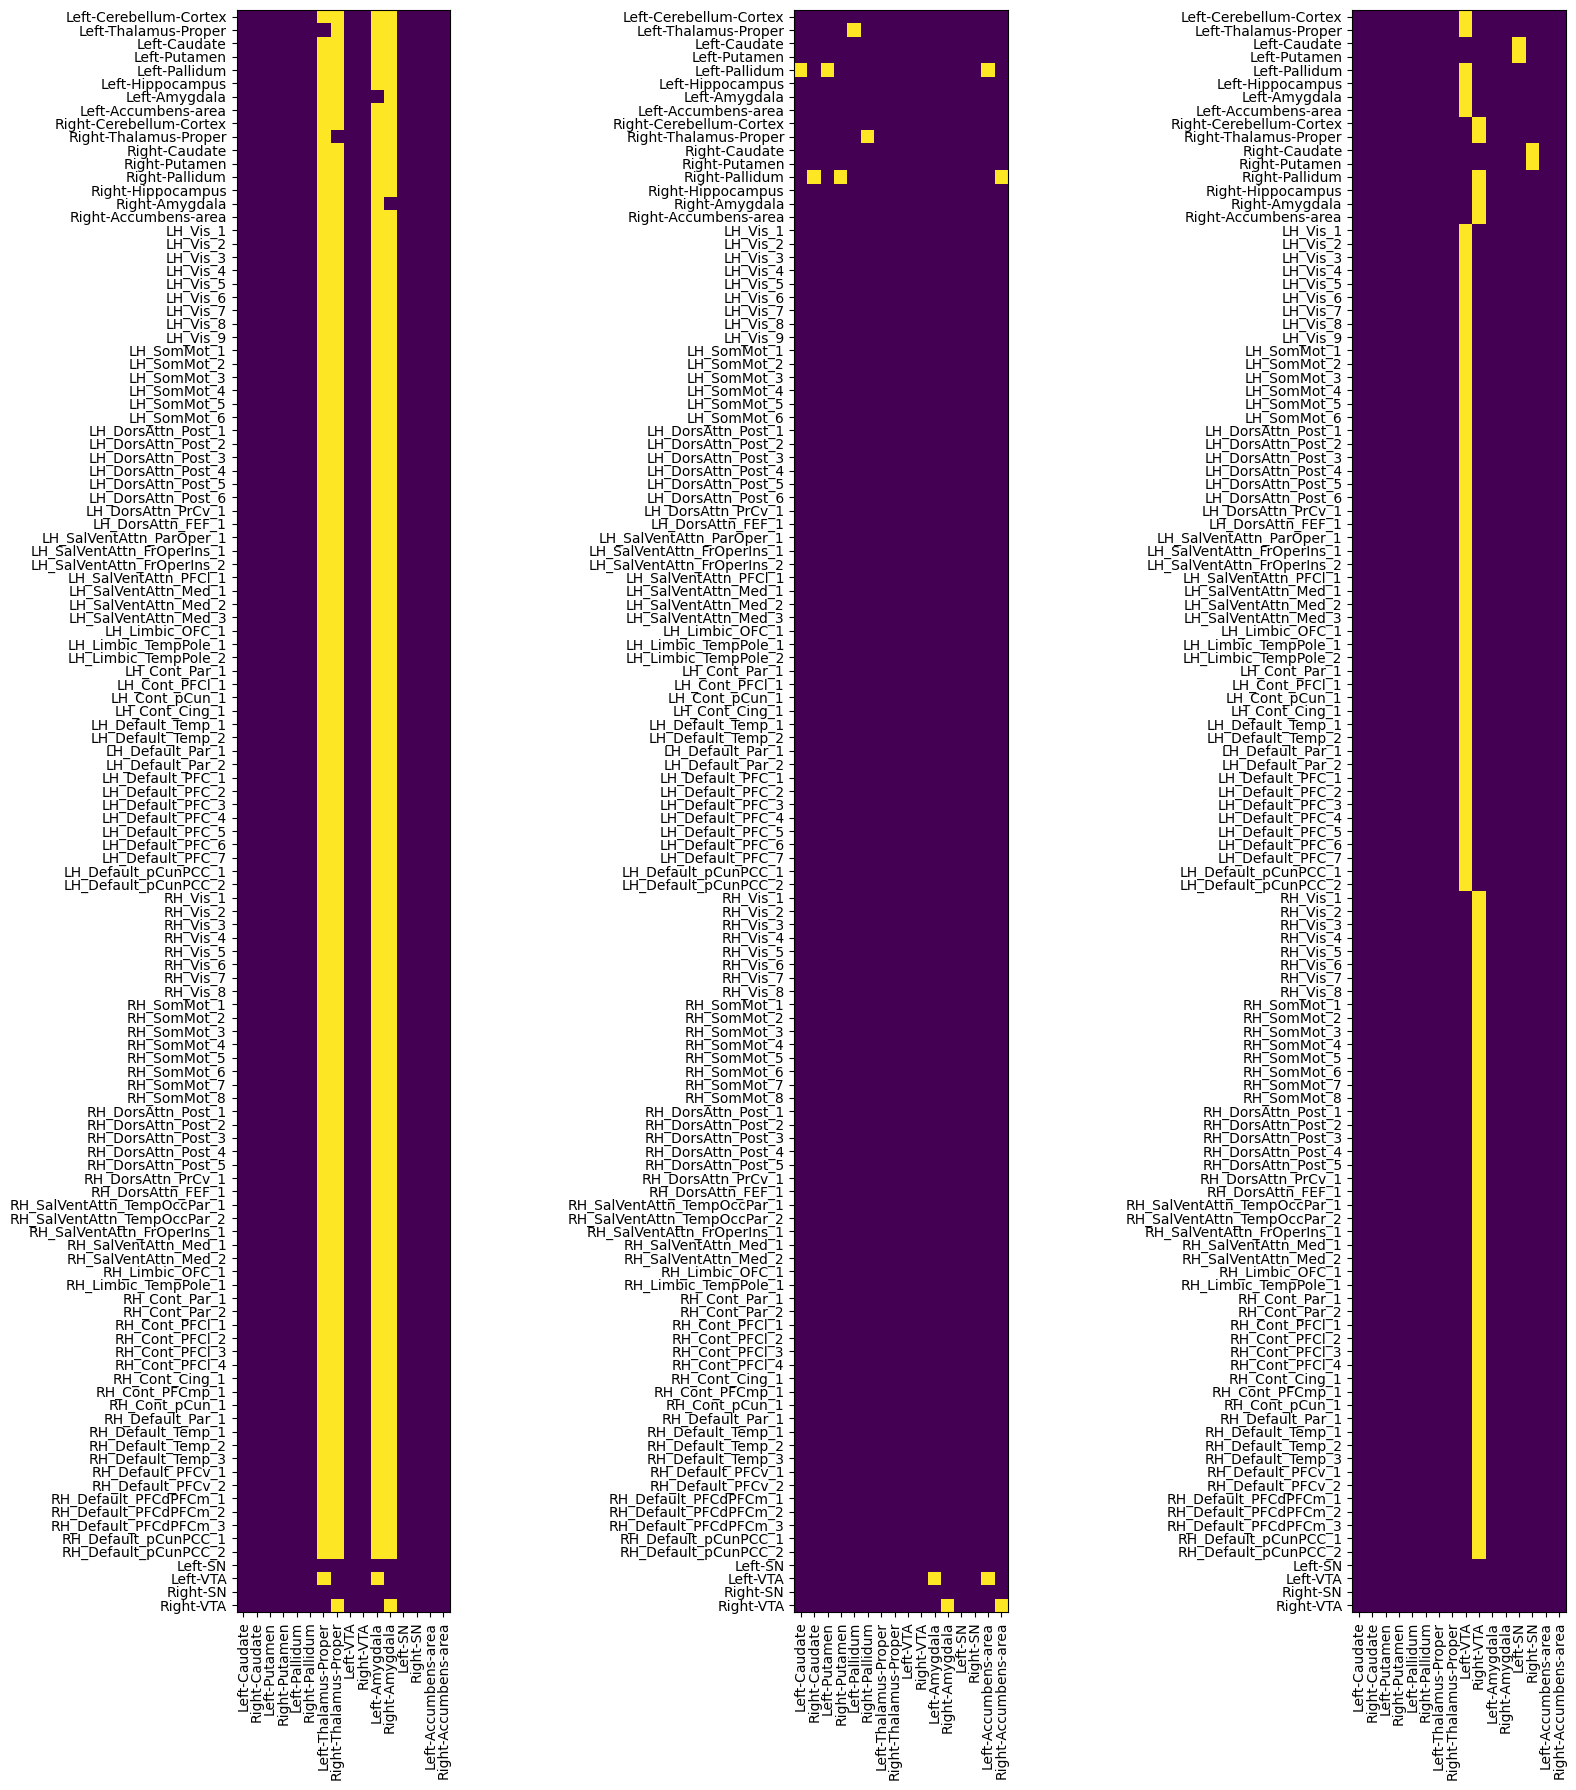

In [10]:
Cem_reduced = Ce_mask[:, rois_idx]
Cim_reduced = Ci_mask[:, rois_idx]
Cd_reduced = Cd_mask[:, rois_idx]

plt.figure(figsize=(18,18))
plt.subplot(131)
plt.imshow(Cem_reduced)
plt.xticks(np.arange(len(rois)), rois, rotation=90)
plt.yticks(np.arange(len(regions_names)), regions_names)
plt.subplot(132)
plt.imshow(Cim_reduced)
plt.xticks(np.arange(len(rois)), rois, rotation=90)
plt.yticks(np.arange(len(regions_names)), regions_names)
plt.subplot(133)
plt.imshow(Cd_reduced)
plt.xticks(np.arange(len(rois)), rois, rotation=90)
plt.yticks(np.arange(len(regions_names)), regions_names)
plt.tight_layout()

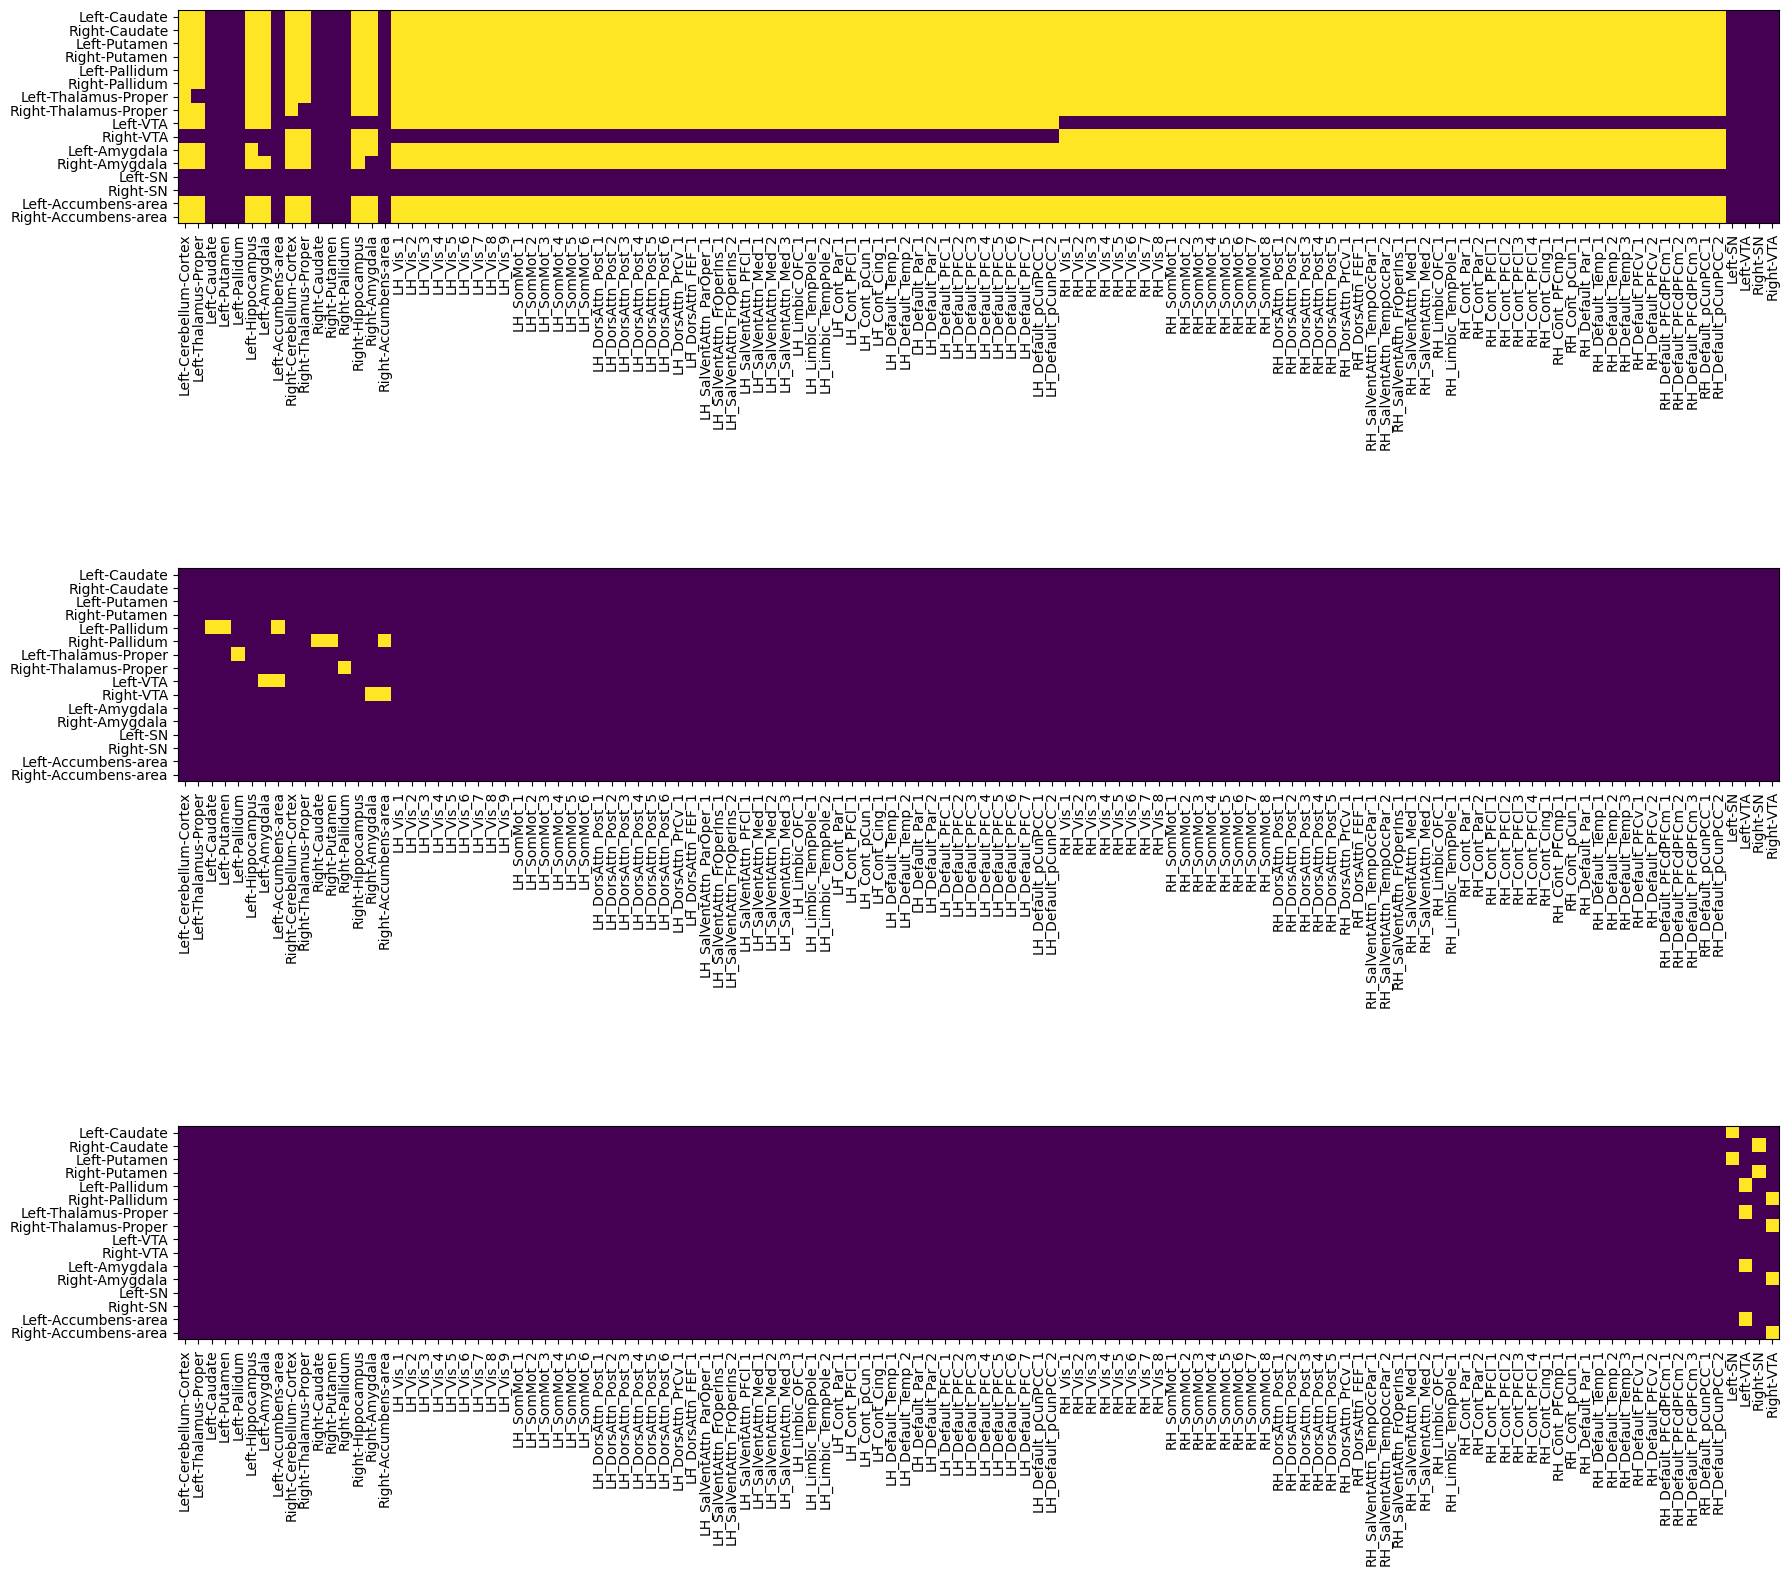

In [11]:
rois = ['Left-Caudate', 'Right-Caudate', 'Left-Putamen', 'Right-Putamen', 'Left-Pallidum', 'Right-Pallidum', 'Left-Thalamus-Proper', 'Right-Thalamus-Proper', 'Left-VTA', 'Right-VTA', 'Left-Amygdala', 'Right-Amygdala', 'Left-SN', 'Right-SN', 'Left-Accumbens-area', 'Right-Accumbens-area']
rois_idx = [regions_names.index(i) for i in rois]

Cem_reduced = Ce_mask[rois_idx, :]
Cim_reduced = Ci_mask[rois_idx, :]
Cdm_reduced = Cd_mask[rois_idx, :]

plt.figure(figsize=(18,18))
plt.subplot(311)
plt.imshow(Cem_reduced)
plt.yticks(np.arange(len(rois)), rois)
plt.xticks(np.arange(len(regions_names)), regions_names, rotation=90)
plt.subplot(312)
plt.imshow(Cim_reduced)
plt.xticks(np.arange(len(regions_names)), regions_names, rotation=90)
plt.yticks(np.arange(len(rois)), rois)
plt.subplot(313)
plt.imshow(Cdm_reduced)
plt.xticks(np.arange(len(regions_names)), regions_names, rotation=90)
plt.yticks(np.arange(len(rois)), rois)
plt.tight_layout()

In [8]:
anti_rois_idx = [regions_names.index(i) for i in regions_names if i not in rois]
anti_rois = [regions_names[i] for i in anti_rois_idx]

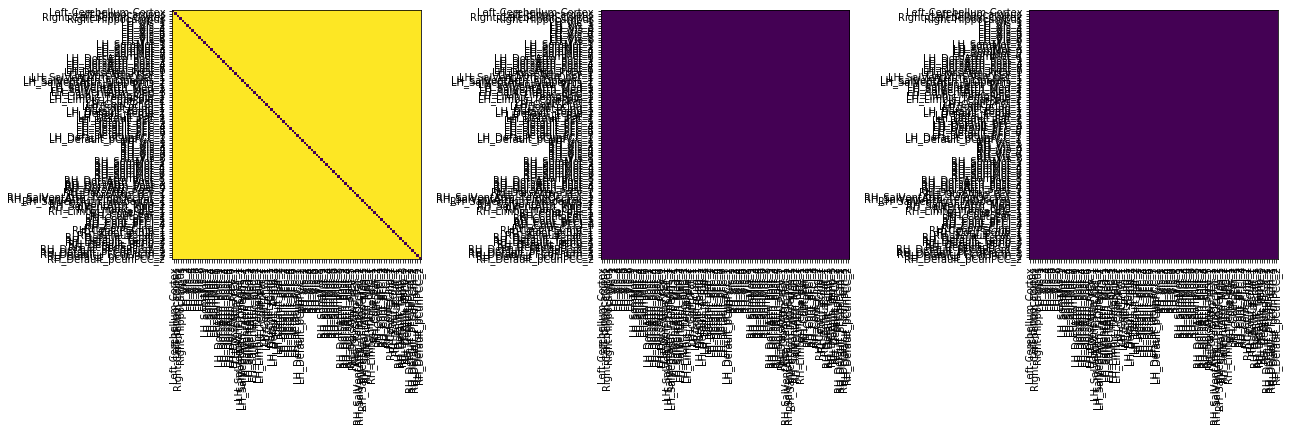

In [9]:
Ce_reduced = Ce_mask[anti_rois_idx, :][:, anti_rois_idx]
Ci_reduced = Ci_mask[anti_rois_idx, :][:, anti_rois_idx]
Cd_reduced = Cd_mask[anti_rois_idx, :][:, anti_rois_idx]

plt.figure(figsize=(18,6))
plt.subplot(131)
plt.imshow(Ce_reduced)
plt.xticks(np.arange(len(anti_rois)), anti_rois, rotation=90)
plt.yticks(np.arange(len(anti_rois)), anti_rois)
plt.subplot(132)
plt.imshow(Ci_reduced)
plt.xticks(np.arange(len(anti_rois)), anti_rois, rotation=90)
plt.yticks(np.arange(len(anti_rois)), anti_rois)
plt.subplot(133)
plt.imshow(Cd_reduced)
plt.xticks(np.arange(len(anti_rois)), anti_rois, rotation=90)
plt.yticks(np.arange(len(anti_rois)), anti_rois)
plt.tight_layout()

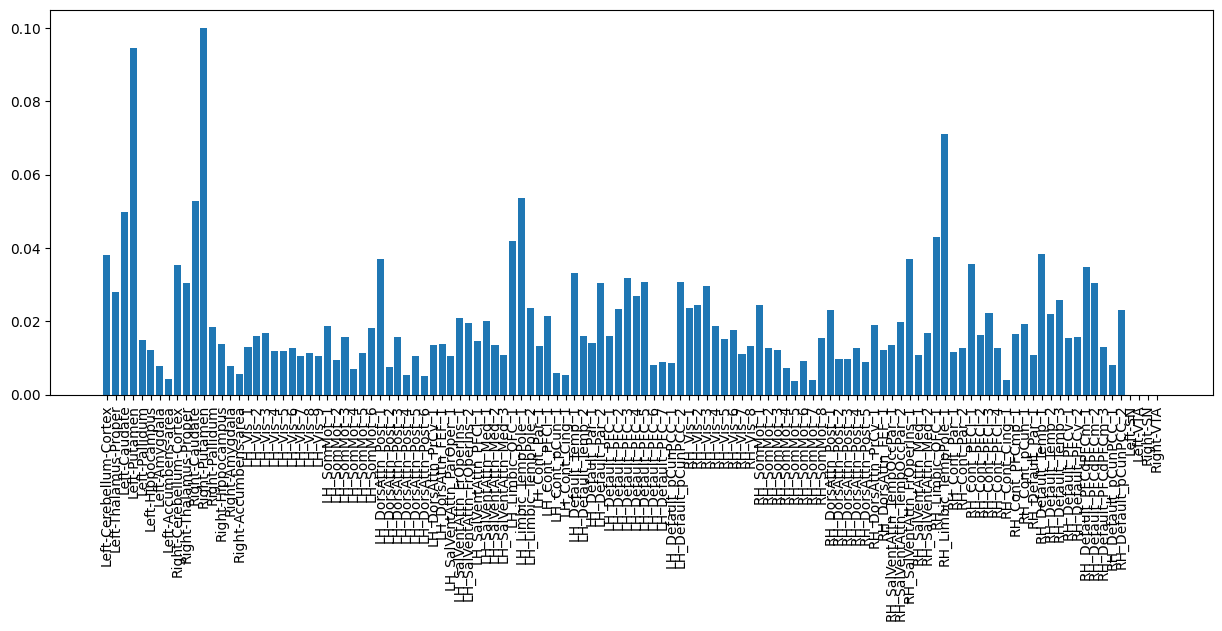

In [32]:
import numpy as np
import matplotlib.pyplot as plt

struc_dir = '/home/prior/gp_home/vbt/dopamine_model/structural_data/'
regions_names = list(np.load(struc_dir + f'{atlas}_regions_names.npy'))
atlas = 'schaefer'
RRd = np.load(struc_dir + f'{atlas}_RRd.npy')
plt.figure(figsize=(15,5))
plt.bar(regions_names, RRd)
plt.xticks(rotation=90)
plt.show()


In [12]:
Ce_mask_df = pd.DataFrame(Ce_mask, index=regions_names, columns=regions_names)
Ci_mask_df = pd.DataFrame(Ci_mask, index=regions_names, columns=regions_names)
Cd_mask_df = pd.DataFrame(Cd_mask, index=regions_names, columns=regions_names)

Ce_mask_df.to_csv(f'{atlas}_Ce_mask.csv')
Ci_mask_df.to_csv(f'{atlas}_Ci_mask.csv')
Cd_mask_df.to_csv(f'{atlas}_Cd_mask.csv')